## Modelos Regresion Lineal PM25

### Modelo Maquína de Soporte Vectorial

In [1]:
# Tratamiento de datos
import pandas as pd
# Almacenar en caché los resultados de funciones en el disco
import joblib
# Metricas para evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
# Creación de modelo de maquinas de soporte vectorial
from sklearn.svm import SVR
# Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Optimización de hiperparametros
from sklearn.model_selection import GridSearchCV
# Uso de validacion cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Exportamos los datos del archivo dataSetLimpio4 dado que tiene algunas manipulaciones de las columnas en una clasificacion categorica, eliminamos valores nulos, contaminación 0.5 y quitamos registros atipicos
limpiaDataSetCalidadAire = pd.read_csv('data/stage/dataSetLimpio4.csv')
limpiaDataSetCalidadAire.shape

(19447, 25)

In [3]:
# Revisamos el comportamiento por toma de muestras de los datos y usando variación entre columnas.
# Nota: Se estaba presentando buen comportamiento entre algunos meses del dataset, por ende,
# revisamos algunos registros por meses para identificar diferenciaciones.
# Finalmente, dejamos el dataset completo con la línea siguiente:
limpiaDataSetCalidadAire =limpiaDataSetCalidadAire.sample(n = 19447, random_state=123).iloc[:,:]
limpiaDataSetCalidadAire

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
11216,2024,2,27,1,30,0,19,80,852,0,...,1,0,1,0,0,0,1,0,0,0
8084,2024,7,8,4,9,0,15,86,825,0,...,1,0,0,0,1,0,1,0,0,0
1474,2024,3,14,1,31,0,22,84,0,0,...,0,1,0,0,0,1,1,0,0,0
12353,2024,4,24,11,15,0,27,51,851,0,...,1,0,1,0,0,0,0,1,0,0
3915,2024,8,15,1,25,0,20,84,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,2024,6,12,19,10,0,23,72,851,0,...,1,0,1,0,0,0,0,0,1,0
7763,2024,6,23,6,11,0,15,88,827,0,...,0,0,0,0,1,0,0,1,0,0
15377,2024,9,6,21,27,0,23,67,850,0,...,0,1,1,0,0,0,0,0,1,0
17730,2024,5,22,10,29,0,27,61,852,0,...,1,0,0,1,0,0,0,1,0,0


In [4]:
# Separamos los datos de variables independientes y la variable dependiente
X = limpiaDataSetCalidadAire.drop(columns ='pm25')
y = limpiaDataSetCalidadAire['pm25']
# Separamos las columnas de las variables independientes de la dependiente
x_cols = X.columns.tolist()

In [5]:
# División de los datos en datos de entrenamiento del modelo, y datos para el testeo
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, # 70 % de nuestros datos en entrenamiento y 30% de los datos para el testeo
    random_state=1234,
    shuffle=True
)

In [6]:
#Escalar Variables númericas
pd.set_option('display.float_format', lambda x: '%.4f' % x)
scaler = joblib.load('data/stage/estandarizacionDataSet4.pkl')

# Se escalan los valores del dataset entrenamiento y prueba
X_train[x_cols] = scaler.fit_transform(X_train[x_cols])
X_test[x_cols] = scaler.transform(X_test[x_cols])
# Probamos diferentes kernel con hiperparametros para revisar sus evaluaciones
SVMR_linear = SVR(kernel='linear', C = 1000)
SVMR_Pol2 = SVR(kernel='poly', C = 100, degree = 2)
SVMR_Pol3 = SVR(kernel='poly', C = 100, degree = 3)
SVMR_rbf = SVR(kernel='rbf', C = 100)  # Disminuimos el parametro de regularizacion C para que no se tenga tanta diferencia entre las metricas de evaluación de datos de entrenamiento y testeo
# SVMR_sig = SVR(kernel='sigmoid', C = 1000)  # Observamos que el kernel sigmoide no refleja resultados esperados y lo excluimos para el analisis
# Entrenamos los modelos, dado que tenemos gran cantidad de datos toma un tiempo para la ejecución
SVMR_linear.fit(X_train, y_train)
SVMR_Pol2.fit(X_train, y_train)
SVMR_Pol3.fit(X_train, y_train)
SVMR_rbf.fit(X_train, y_train)
#SVMR_sig.fit(X_train, y_train)
print('Linear   Training: ', SVMR_linear.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_linear.predict(X_test)))
print('Poly 2   Training: ', SVMR_Pol2.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_Pol2.predict(X_test)))
print('Poly 3   Training: ', SVMR_Pol3.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_Pol3.predict(X_test)))
print('rbf      Training: ', SVMR_rbf.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_rbf.predict(X_test)))
#print('sigmoide Training: ', SVMR_sig.score(X_train,y_train), 'Test:',r2_score(y_test,SVMR_sig.predict(X_test)))

Linear   Training:  0.1773573465251853 Test: 0.18930319587891553
Poly 2   Training:  0.3047927153853718 Test: 0.2998748858889463
Poly 3   Training:  0.4229661581884916 Test: 0.38931370249483677
rbf      Training:  0.4465240185131295 Test: 0.376663326638621


In [9]:
# luego de la ejecución de los modelos con los hiperparametros predeterminados usamos validación cruzada en 5 pliegues
cross_val_score(SVMR_rbf, X, y, cv=5, scoring='r2')

array([0.05387946, 0.04918886, 0.06417908, 0.07200873, 0.0563894 ,
       0.0724363 , 0.06993513, 0.05193737, 0.04847333, 0.06387322])

Tunning Afinación del modelo

In [10]:
# Nuevamente se asigna a 'X_Completo' y 'y_Completo' los datos entrada y salida respectivamente
X_completo = X
y_completo = y

# Se escalan los datos numéricos de entrada
X_completo[x_cols] = scaler.transform(X_completo[x_cols])
X_completo

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
11216,0.0000,0.1250,0.8667,0.0435,0.0000,0.3182,0.7791,0.9953,0.0000,0.0000,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
8084,0.0000,0.7500,0.2333,0.1739,0.0000,0.1364,0.8488,0.9638,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000
1474,0.0000,0.2500,0.4333,0.0435,0.0000,0.4545,0.8256,0.0000,0.0000,0.1667,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000
12353,0.0000,0.3750,0.7667,0.4783,0.0000,0.6818,0.4419,0.9942,0.0000,0.1667,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3915,0.0000,0.8750,0.4667,0.0435,0.0000,0.3636,0.8256,0.0000,0.0000,0.1667,...,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0.0000,0.6250,0.3667,0.8261,0.0000,0.5000,0.6860,0.9942,0.0000,0.3333,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
7763,0.0000,0.6250,0.7333,0.2609,0.0000,0.1364,0.8721,0.9661,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
15377,0.0000,1.0000,0.1667,0.9130,0.0000,0.5000,0.6279,0.9930,0.0000,0.3333,...,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
17730,0.0000,0.5000,0.7000,0.4348,0.0000,0.6818,0.5581,0.9953,0.0000,0.0000,...,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [9]:
#Se entena el modelo con múltiples hiperparámetros para encontrar el mejor que se adapte

#Se crea una instancia de una SVR Regression
modelsvr = SVR()

# Usamos 5 pliegues
CV = 5

#Se establecen los hiperparámetros para el Kernel lineal
svm_linear = {'C': [0.1, 1],
              'kernel': ['linear']}

#Se establecen los hiperparámetros para el Kernel polinomico
svm_poly = {'C': [0.1, 1],
              'gamma': [1, 0.1, 'auto', 'scale'],
              'degree': [2, 3],
              'kernel': ['poly']}

#Se establecen los hiperparámetros para los kernels rbf
svm_others = {'C': [0.1, 1],
              'gamma': [1, 0.1,'auto', 'scale'],
              'kernel': [ 'rbf']}

#Se unen todos los hiperparametros en una lista de diccionarios
parameters = [svm_linear, svm_poly, svm_others]

# Se define un GridSearchCV con una validacion cruzada de 5 pliegues y con todos los
#hierparametros establecidos anteriormente
grid_svr = GridSearchCV(modelsvr, param_grid=parameters, cv=CV, verbose=3)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_svr.fit(X_completo,y_completo)

Fitting 5 folds for each of 26 candidates, totalling 130 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.162 total time=  16.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.185 total time=  16.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.186 total time=  16.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.189 total time=  16.5s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.165 total time=  15.8s
[CV 1/5] END ................C=1, kernel=linear;, score=0.163 total time=  15.9s
[CV 2/5] END ................C=1, kernel=linear;, score=0.186 total time=  18.3s
[CV 3/5] END ................C=1, kernel=linear;, score=0.187 total time=  16.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.190 total time=  15.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.166 total time=  16.1s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.235 total time=  17.1s
[CV 2/5] END C=0.1, degree=2, gamma=1, kerne

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1], 'kernel': ['linear']},
                         {'C': [0.1, 1], 'degree': [2, 3],
                          'gamma': [1, 0.1, 'auto', 'scale'],
                          'kernel': ['poly']},
                         {'C': [0.1, 1], 'gamma': [1, 0.1, 'auto', 'scale'],
                          'kernel': ['rbf']}],
             verbose=3)

In [10]:
# Obtener los resultados del grid search en un dataframe para manipular
results_grid_svr = pd.DataFrame(grid_svr.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_svr = ['param_C']  + \
                    ['param_degree']  + \
                    ['param_kernel']  + \
                    ['param_gamma']   + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_svr_filtered = results_grid_svr[columns_grid_svr]

# Crear la columna scoreWithStd: f1 / std
results_grid_svr_filtered['scoreWithStd'] = results_grid_svr_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_svr_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
print(results_grid_svr_filtered[['param_C', 'param_degree', 'mean_test_score', 'std_test_score', 'scoreWithStd']])

    param_C  param_degree  mean_test_score  std_test_score  scoreWithStd
0    0.1000           NaN           0.1775          0.0113       15.7298
1    1.0000           NaN           0.1783          0.0114       15.6482
2    0.1000        2.0000           0.2535          0.0134       18.8535
3    0.1000        2.0000           0.1551          0.0092       16.8080
4    0.1000        2.0000           0.0634          0.0076        8.3689
5    0.1000        2.0000           0.2095          0.0110       18.9986
6    0.1000        3.0000           0.3173          0.0152       20.9040
7    0.1000        3.0000           0.1297          0.0087       14.9089
8    0.1000        3.0000           0.0088          0.0068        1.3019
9    0.1000        3.0000           0.2285          0.0116       19.7519
10   1.0000        2.0000           0.2827          0.0153       18.5327
11   1.0000        2.0000           0.2156          0.0114       18.9777
12   1.0000        2.0000           0.1750         

<ipython-input-10-4471c8a65a28>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_grid_svr_filtered['scoreWithStd'] = results_grid_svr_filtered.apply(


In [11]:
# Se identifican los mejores hiperparámetros
best_params = grid_svr.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [12]:
# Top 3 de los mejores scores
results_grid_svr_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_C', 'param_degree', 'param_kernel','param_gamma','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_C,param_degree,param_kernel,param_gamma,mean_test_score,std_test_score,scoreWithStd
14,1.0000,3.0000,poly,1,0.3720,0.0130,28.5417
22,1.0000,NaN,rbf,1,0.2727,0.0116,23.5500
6,0.1000,3.0000,poly,1,0.3173,0.0152,20.9040


In [13]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_svr_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

,14
param_C,1.0000
param_degree,3.0000
param_kernel,poly
param_gamma,1
mean_test_score,0.3720
std_test_score,0.0130
split0_test_score,0.3549
split1_test_score,0.3935
split2_test_score,0.3781
split3_test_score,0.3674


In [14]:
# Se crea un modelo SVR con los mejores hiperparámetros
modelsvr = SVR( kernel = best_params["kernel"]
                    , gamma = best_params["gamma"]
                    , C= best_params["C"]
                    , degree = best_params["degree"])


#Se entrena el modelo con los datos completos
modelsvr.fit(X_completo, y_completo)

SVR(C=1, gamma=1, kernel='poly')

In [15]:
#Se guardan los modelos de SVC

joblib.dump(modelsvr, 'data/analytics/modelosPM25/SVR_CV_varios_cal_aire_pm25.pkl')

### Regresión Lineal

Librerías

In [1]:
import pandas as pd
from scipy.stats import t, norm, shapiro, levene,pearsonr, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import joblib

In [2]:
dataSetCalidadAire = pd.read_csv("data/stage/dataSetLimpio4.csv")

In [3]:
dataSetCalidadAire

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,2024,1,1,0,16,1,20,84,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2024,1,1,2,47,1,18,82,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2024,1,1,6,39,1,17,84,0,0,...,1,0,0,0,0,1,0,1,0,0
3,2024,1,1,8,29,1,21,74,0,0,...,1,0,0,0,0,1,0,1,0,0
4,2024,1,1,9,38,1,22,71,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19442,2024,9,30,18,22,0,19,86,850,0,...,1,0,0,1,0,0,0,0,1,0
19443,2024,9,30,19,26,0,19,86,851,0,...,1,0,0,1,0,0,0,0,1,0
19444,2024,9,30,21,41,0,18,87,852,0,...,1,0,0,1,0,0,0,0,1,0
19445,2024,9,30,22,37,0,18,87,853,0,...,1,0,0,1,0,0,0,0,1,0


#### Se emplea el análisis de regresión lineal múltiple 

In [4]:
# Dividiendo los datos
X = dataSetCalidadAire.drop(columns='pm25')
y = dataSetCalidadAire['pm25']


In [5]:
# Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo

X = sm.add_constant(X) # Es el intercepto
modelo = sm.OLS(y,X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     244.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:20:18   Log-Likelihood:                -70579.
No. Observations:               19447   AIC:                         1.412e+05
Df Residuals:                   19427   BIC:                         1.414e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
anio                

##### Identificación de observaciones que puedan considerarse problemáticas (datos atípicos, puntos de balanceo e influyentes) y analizar si debe eliminarse del conjunto de datos o no.

In [6]:
# Debemos revisar los valores atipicos del modelo, de tal forma que si existen los identificamos y sustraemos 
# para generar el nuevo modelo, esto lo realizamos con los test Cook, Diffits, Leverage y DFBETAS

influence = modelo.get_influence()
influence_summary = influence.summary_frame()
influence_summary

,dfb_anio,dfb_mes,dfb_dia,dfb_hora,dfb_festivo,dfb_temperatura,dfb_humedad,dfb_presion,dfb_p1,dfb_velocidad_prom,...,dfb_franja_horaria_Madrugada,dfb_franja_horaria_Mañana,dfb_franja_horaria_Noche,dfb_franja_horaria_Tarde,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.001649,0.008500,0.006679,0.008439,-0.025658,0.001357,0.002358,-0.001926,1.514019,0.004091,...,0.004483,0.008329,-0.006966,-0.002824,0.000049,-0.779043,0.001947,-0.034411,-0.779035,-0.034411
1,0.002142,-0.033012,-0.022809,-0.006347,0.082671,-0.039088,-0.038212,0.000355,8.144124,0.030697,...,0.000709,-0.017393,0.003402,0.007503,0.000608,2.564483,0.002214,0.120789,2.564851,0.120806
2,0.012334,-0.021807,-0.011103,-0.012820,0.041962,-0.029992,-0.019915,-0.010614,4.813248,-0.017447,...,-0.018625,0.000836,0.010562,0.014641,0.000192,1.316977,0.002644,0.067811,1.317002,0.067812
3,0.000764,-0.002449,-0.001559,-0.000348,0.006067,-0.001574,-0.001433,-0.000656,-0.847296,-0.002262,...,-0.000731,0.001178,0.000132,0.000101,0.000003,0.186910,0.002125,0.008626,0.186906,0.008626
4,0.003298,-0.015185,-0.009801,0.002585,0.038089,-0.006216,-0.007458,-0.002835,7.202491,-0.014023,...,0.000697,0.010592,-0.003572,-0.003931,0.000117,1.170945,0.002040,0.052948,1.170957,0.052948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19442,0.002891,0.004462,0.006013,-0.005516,-0.001657,-0.005061,-0.001635,-0.002642,3.380226,0.003485,...,-0.007613,-0.005276,0.007220,0.005543,0.000014,0.559803,0.001089,0.018480,0.559793,0.018480
19443,-0.001031,0.008387,0.010279,-0.005781,-0.002718,-0.007870,-0.002922,0.001424,5.195308,0.006246,...,-0.009642,-0.008230,0.008859,0.008877,0.000041,0.993672,0.000995,0.031363,0.993672,0.031363
19444,-0.015147,0.020910,0.025562,0.006796,-0.007174,-0.032248,-0.018271,0.016617,3.610128,0.015222,...,-0.006297,-0.012796,0.002258,0.018643,0.000326,2.629213,0.001132,0.088504,2.629613,0.088517
19445,-0.025395,0.015326,0.019970,0.014512,-0.005719,-0.024799,-0.015969,0.026498,0.070820,0.012041,...,0.003740,-0.008488,-0.006649,0.012505,0.000255,2.173498,0.001296,0.078299,2.173707,0.078306


Pasos para hallar la distancias de Cook

In [7]:
cook = influence.cooks_distance[0]
cook

array([4.93387467e-05, 6.07911655e-04, 1.91594489e-04, ...,
       3.26370717e-04, 2.55444915e-04, 1.38782219e-04])

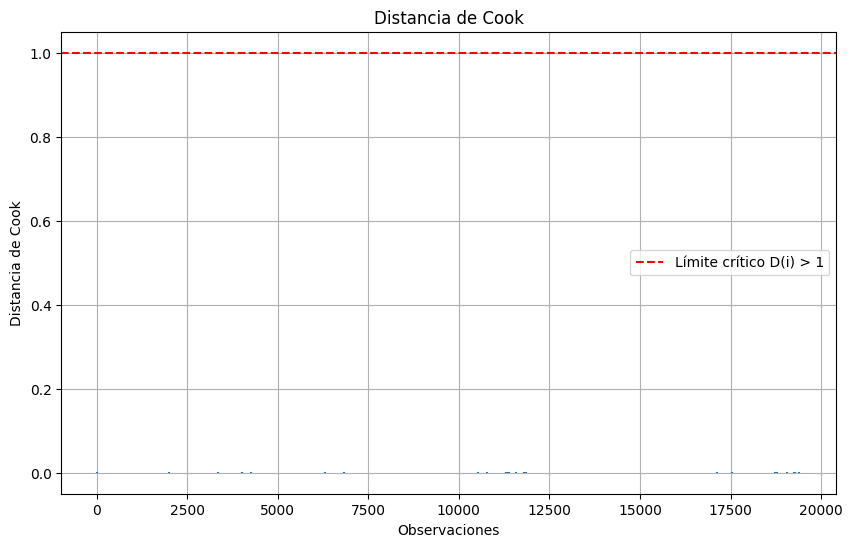

In [8]:
# Graficar la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(range(len(cook)), cook, markerfmt=" ", basefmt=" ")
plt.title('Distancia de Cook')
plt.xlabel('Observaciones')
plt.ylabel('Distancia de Cook')
plt.axhline(y=1, color='r', linestyle='--', label='Límite crítico D(i) > 1')
plt.legend()
plt.grid()
plt.show()

Punto influyente por distancia de Cook

In [9]:
puntoInfluyenteCook = dataSetCalidadAire[cook > (1) ]
puntoInfluyenteCook

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde


Puntos de influencia con DFFITS 

In [10]:
dffits = influence.dffits[0] 
dffits

array([-0.03441084,  0.12080592,  0.06781181, ...,  0.08851713,
        0.07830615,  0.0577149 ])

In [11]:
#Puntos de influencia por DFFITS

puntosInfluenciaDFFITS = dataSetCalidadAire[np.abs(dffits) > 2 * np.sqrt(len(X) * modelo.df_model / modelo.df_resid)]
puntosInfluenciaDFFITS

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde


Hallamos los residuales estudentizados

In [12]:
residualesEstudentizados = influence.resid_studentized_external
residualesEstudentizados

array([-0.77903539,  2.56485132,  1.31700169, ...,  2.62961304,
        2.17370676,  1.54284123])

puntos influyentes de residuales estudentizados: [    1    16    18    23    35    48    49    97    98   134   141   142
   254   319   320   352   385   407   514   526   527   533   535   540
   542   551   552   645   646   647   649   654   700   704   711   770
   771   772   773   774   775   776   793   794   815   873   874  1041
  1071  1072  1073  1074  1083  1098  1099  1184  1185  1188  1189  1196
  1206  1224  1225  1226  1228  1229  1239  1240  1241  1246  1251  1252
  1253  1255  1259  1260  1268  1269  1270  1277  1304  1305  1306  1307
  1313  1314  1322  1323  1324  1330  1332  1333  1335  1336  1337  1340
  1358  1364  1365  1366  1367  1373  1377  1378  1394  1414  1417  1418
  1456  1459  1511  1513  1515  1517  1518  1521  1560  1561  1574  1614
  1628  1670  1682  1720  1722  1775  1785  1792  1793  1795  1796  1809
  1810  1814  1828  1834  1837  1849  1850  1851  1852  1855  1857  1859
  1860  1861  1867  1868  1869  1870  1871  1877  1878  1879  1882  1883
  

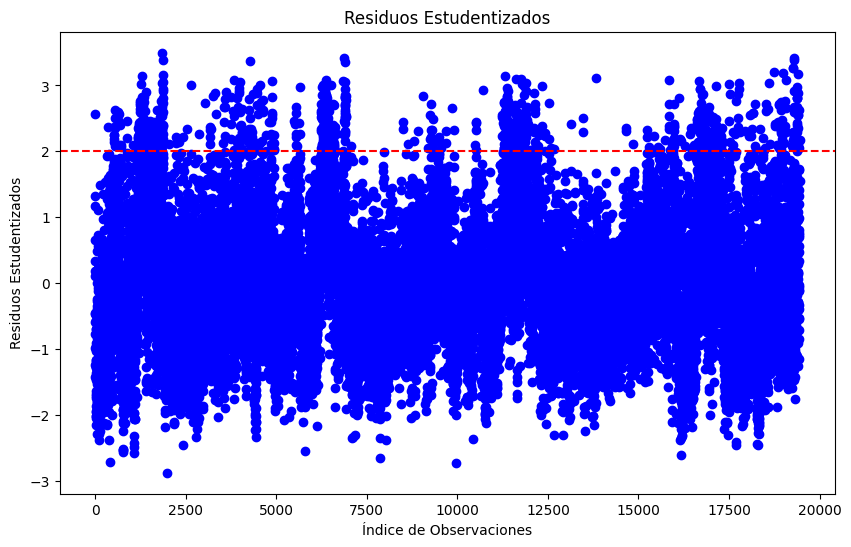

In [13]:
# Establecer un umbral
umbral = 2  

# Identificar puntos influyentes
puntosInfluyentesEstudentizados = np.where(abs(residualesEstudentizados) > umbral)[0]

# Mostrar los índices de puntos influyentes
print("puntos influyentes de residuales estudentizados:", puntosInfluyentesEstudentizados)

# Graficar los residuos estandarizados
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(dataSetCalidadAire)), residualesEstudentizados, color='blue')
plt.axhline(y=umbral, color='red', linestyle='--')
plt.title('Residuos Estudentizados')
plt.xlabel('Índice de Observaciones')
plt.ylabel('Residuos Estudentizados')
plt.show()

Puntos de influencia por el método de leverage

In [14]:
leverage = influence.hat_matrix_diag
leverage

array([0.00194729, 0.00221355, 0.00264416, ..., 0.00113182, 0.00129606,
       0.00139742])

In [15]:
puntoInfluenciaLeverage = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))
print(f"Este son mis puntos influenciables de Leverage:   \n{dataSetCalidadAire.iloc[puntoInfluenciaLeverage]}")

Este son mis puntos influenciables de Leverage:   
       anio  mes  dia  hora  pm25  festivo  temperatura  humedad  presion  p1  \
0      2024    1    1     0    16        1           20       84        0   0   
1      2024    1    1     2    47        1           18       82        0   0   
2      2024    1    1     6    39        1           17       84        0   0   
3      2024    1    1     8    29        1           21       74        0   0   
4      2024    1    1     9    38        1           22       71        0   0   
...     ...  ...  ...   ...   ...      ...          ...      ...      ...  ..   
19361  2024    9   26    17     2        0           18       81      850   0   
19380  2024    9   27    17     9        0           19       85      849   0   
19381  2024    9   27    18    15        0           19       84      850   0   
19395  2024    9   28    12    32        0           24       65      849   0   
19421  2024    9   29    16     7        0           19   

Bajo lo anterior observamos que según los test de observaciones influenciales, los registros de indices 6 y 10 podrían tratarse de datos atipicos, por ende, eliminamos dichos registros de los puntos de datos para usarlos en el modelo

In [16]:
len(dataSetCalidadAire)

19447

In [17]:
 
# Combina todos los índices en un solo array
indices_a_eliminar = np.unique(np.concatenate((puntosInfluyentesEstudentizados, 
                                                puntoInfluenciaLeverage[0] 
                                                )))
dataSetCalidadAire.drop(indices_a_eliminar, inplace=True)

# #Eliminar registros de los puntos influyentes de los residuos estudentizados
# dataSetCalidadAire.drop(puntosInfluyentesEstudentizados, inplace=True)
len(dataSetCalidadAire)


17538

In [18]:
# indices_a_eliminar = [puntosInfluyentesEstudentizados,puntoInfluenciaLeverage,dataSetCalidadAire.iloc[puntosInfluenciaDFBETAS]]
# dataSetCalidadAire.drop(indices_a_eliminar, inplace=True)
X = dataSetCalidadAire.drop(columns='pm25')
y = dataSetCalidadAire['pm25']
X = sm.add_constant(X)
modelo = sm.OLS(y,X).fit()
resumen_modelo=modelo.summary()

In [19]:
dataSetCalidadAire.head(3)

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
17,2024,1,2,2,14,0,20,85,0,0,...,1,0,0,0,0,1,1,0,0,0
19,2024,1,2,4,8,0,20,87,0,0,...,1,0,0,0,0,1,1,0,0,0
20,2024,1,2,5,10,0,19,87,0,0,...,1,0,0,0,0,1,1,0,0,0


In [20]:
print(resumen_modelo)

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     282.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:36:37   Log-Likelihood:                -61396.
No. Observations:               17538   AIC:                         1.228e+05
Df Residuals:                   17518   BIC:                         1.230e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
anio                

In [21]:
# Correlación lineal entre variables numéricas
# ==============================================================================
corr_matrix = dataSetCalidadAire.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,presion,estacion_Estacion Itagui,-0.999595,0.999595
1,direccion_prom,direccion_max,0.961134,0.961134
2,velocidad_prom,velocidad_max,0.878326,0.878326
3,temperatura,humedad,-0.831169,0.831169
4,hora,franja_horaria_Madrugada,-0.750800,0.750800
...,...,...,...,...
248,velocidad_prom,dia_semana_Inicio Semana,0.000548,0.000548
249,estacion_Estacion Itagui,franja_horaria_Madrugada,-0.000305,0.000305
250,dia_semana_Fin de Semana,estacion_Estacion Belen,-0.000227,0.000227
251,estacion_Estacion Belen,franja_horaria_Mañana,0.000051,0.000051


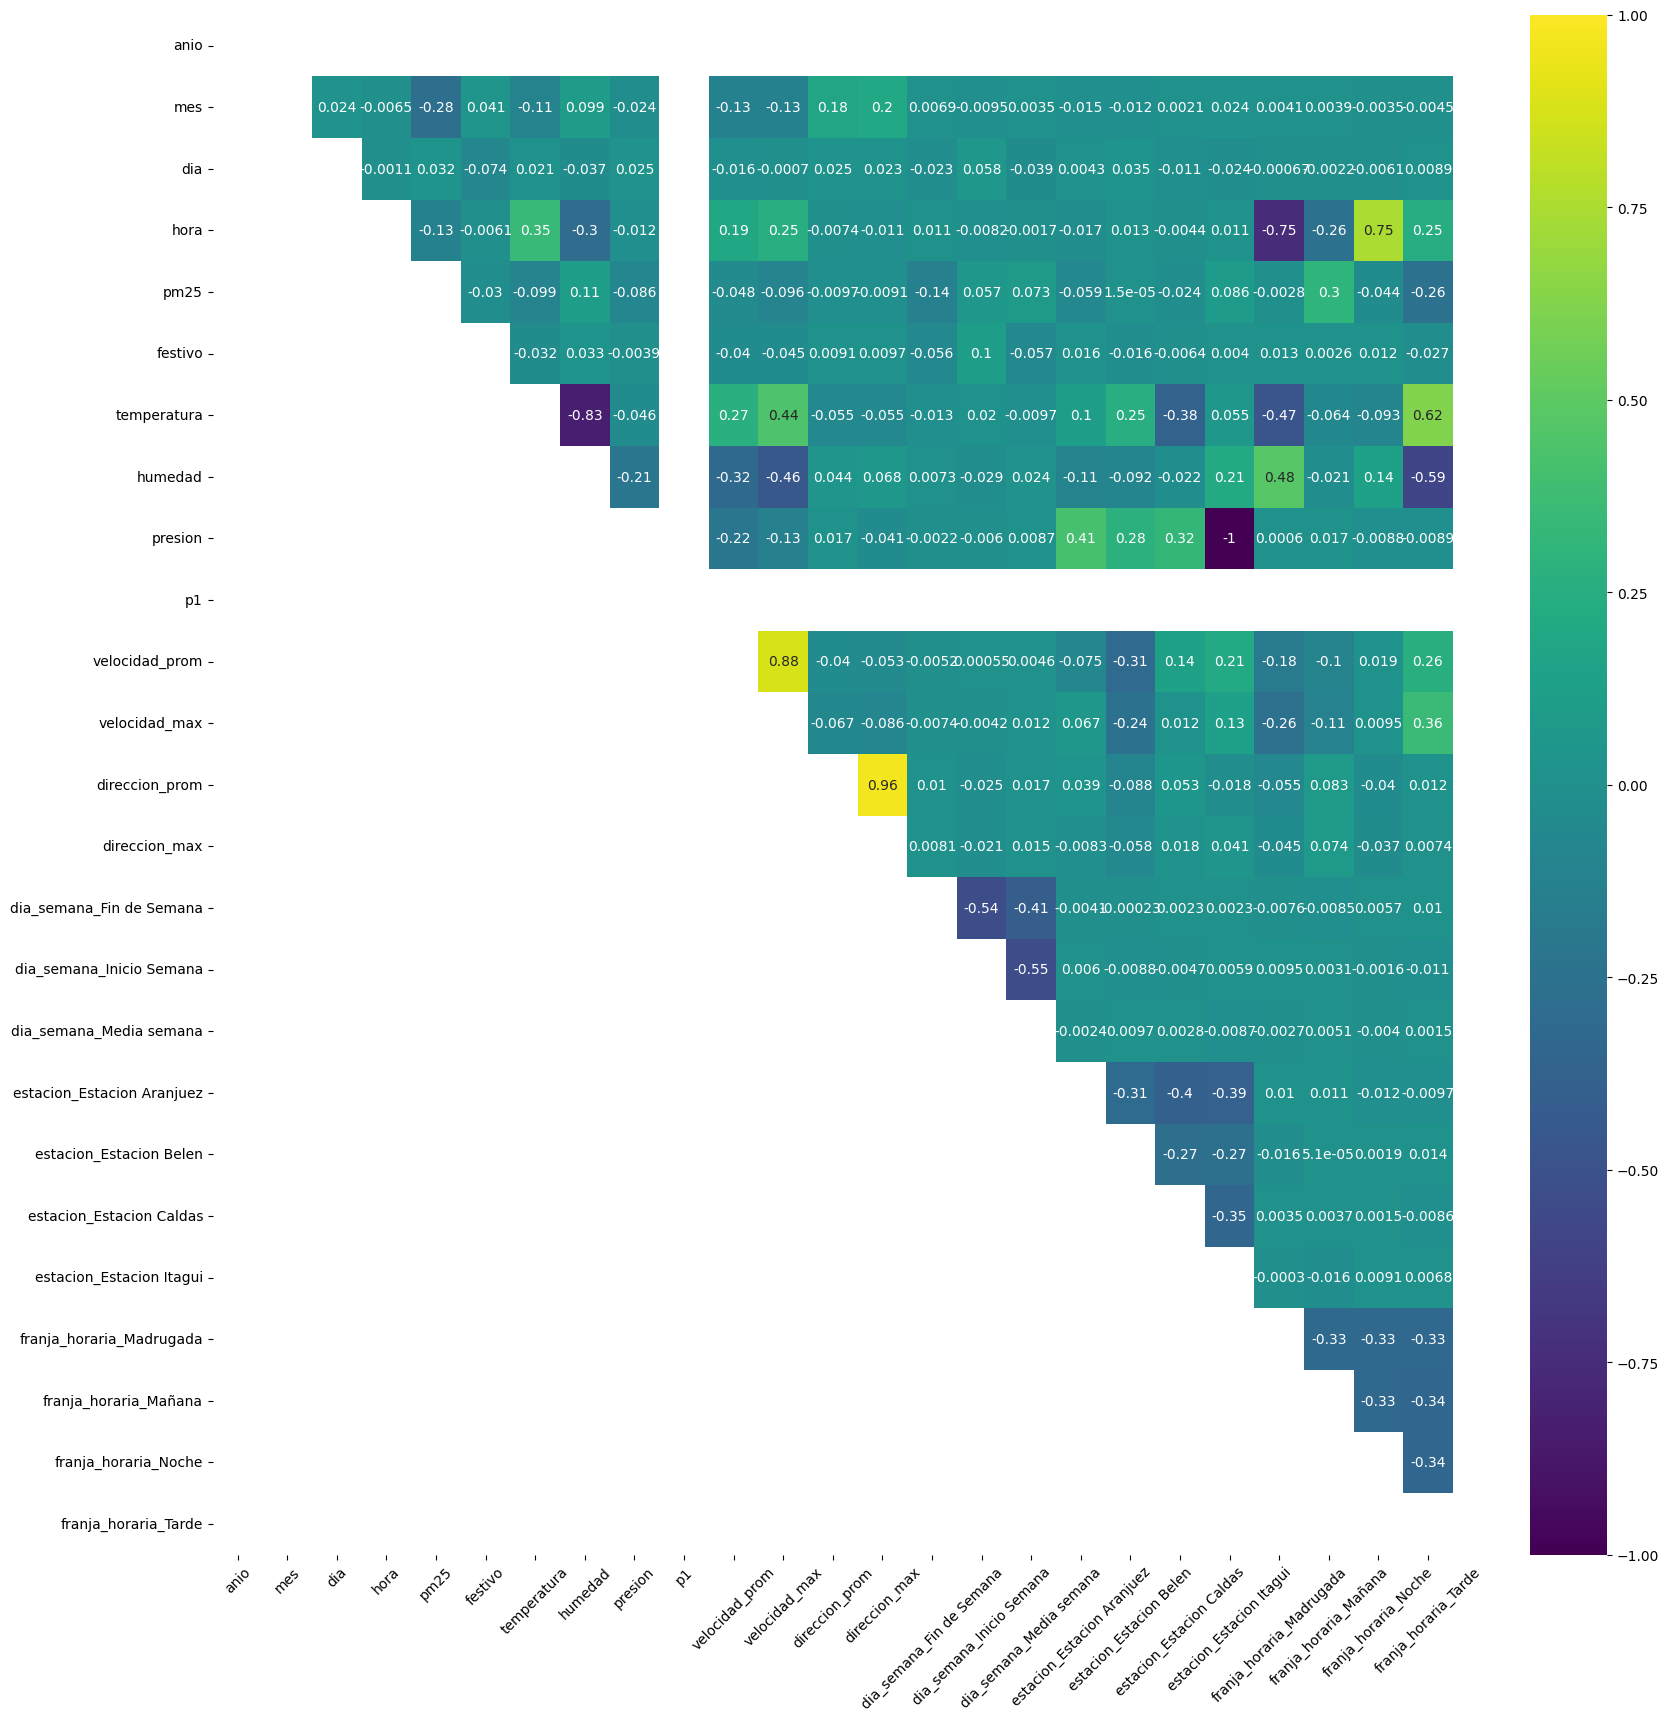

In [22]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = False,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45
)
ax.tick_params(labelsize = 10)

### Significancia de acuerdo a la matriz de correlación
De acuerdo a nuestra matriz de correlación y al gráfico heatmap podemos concluir que la variable x2 no tiene una correlación alta con nuestra variable predictora Y, esto nos puede confirmar la prueba de significancia en cuanto a que x2 no tenga significancia en el modelo

5. Analice si hay problemas de multicolinealidad.

In [23]:
# Multicolinealidad (Inflación de varianza VIF)
# Correlación entre predictores numéricos
# ==============================================================================
corr_matrix = X.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,presion,estacion_Estacion Itagui,-0.999595,0.999595
1,direccion_prom,direccion_max,0.961134,0.961134
2,velocidad_prom,velocidad_max,0.878326,0.878326
3,temperatura,humedad,-0.831169,0.831169
4,hora,franja_horaria_Madrugada,-0.750800,0.750800
...,...,...,...,...
226,presion,franja_horaria_Madrugada,0.000602,0.000602
227,velocidad_prom,dia_semana_Inicio Semana,0.000548,0.000548
228,estacion_Estacion Itagui,franja_horaria_Madrugada,-0.000305,0.000305
229,dia_semana_Fin de Semana,estacion_Estacion Belen,-0.000227,0.000227


Para confirmar la existencia de multicolinealidad desde la matriz de correlación usamos el diagnostico por valores propios:

 ### Analisis de Valores propios (X^T X)


In [24]:
x_nuevo = X
xtx=np.dot(x_nuevo.T,x_nuevo) # Caculamos la matriz Trasnpuesta de X
valores_propios,_ =np.linalg.eig(xtx) #Obtenemos  los valores propios con linalg.eig

lambda_max=np.max(valores_propios) #Calcular Valor Propio máximo

indice_condicion= np.sqrt(lambda_max/valores_propios) # Calculamos el indice de condicion 
print(xtx)



#Resultados:
print('\nValores Propios (λ_j):')
print(valores_propios)
print('-------------------------------------------------------------------------------------------------------')
print('\nValor Propio Máximo (λmáx):')
print(lambda_max)
print('-------------------------------------------------------------------------------------------------------')
print('\nÍndices de Condición (√κ_j):')
print(indice_condicion)
print('-------------------------------------------------------------------------------------------------------')

#Interpretacion:

for j,indice in enumerate(indice_condicion): # Recorremos el indice para obtener tanto su  valor e indice
    print(f"\nÍndice de Condición para λ_{j+1}: √κ_{j+1} = {indice}")
    if indice < 10:
        print("No hay problemas de multicolinealidad.")
        print('-------------------------------------------------------------------------------------------------------')
    elif 10 <= indice < 30:
        print("Multicolinealidad moderada.")
        print('-------------------------------------------------------------------------------------------------------')
    else:
        print(" Multicolinealidad Severa.")
        print('-------------------------------------------------------------------------------------------------------')


[[71845749888   183546440   565212120   412049968      271216   784931488
   2489376296 22232213080           0    37294224    73450960  5355085032
   5578589280    10239416    14740792    10516704    10868880     6193440
      9346832     9087760     8664744     8814520     8948104     9069544]
 [  183546440      593261     1453542     1050596         861     1986286
      6432248    56381041           0       89885      179747    14527146
     15188470       26304       37440       26941       27449       15605
        23921       23710       22218       22598       22790       23079]
 [  565212120     1453542     5754911     3240479        1158     6187252
     19495323   176295310           0      291279      577697    42512429
     44226563       78942      120265       80048       85807       50738
        72824       69886       68122       69201       69997       71935]
 [  412049968     1050596     3240479     3192014        1491     4663116
     13699898   126994035          

C:\Users\USER\AppData\Local\Temp\ipykernel_16472\172151452.py:7: RuntimeWarning: divide by zero encountered in divide
  indice_condicion= np.sqrt(lambda_max/valores_propios) # Calculamos el indice de condicion
C:\Users\USER\AppData\Local\Temp\ipykernel_16472\172151452.py:7: RuntimeWarning: invalid value encountered in divide
  indice_condicion= np.sqrt(lambda_max/valores_propios) # Calculamos el indice de condicion


In [25]:
X.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['anio', 'mes', 'dia', 'hora', 'festivo', 'temperatura', 'humedad',
       'presion', 'p1', 'velocidad_prom', 'velocidad_max', 'direccion_prom',
       'direccion_max', 'dia_semana_Fin de Semana', 'dia_semana_Inicio Semana',
       'dia_semana_Media semana', 'estacion_Estacion Aranjuez',
       'estacion_Estacion Belen', 'estacion_Estacion Caldas',
       'estacion_Estacion Itagui', 'franja_horaria_Madrugada',
       'franja_horaria_Mañana', 'franja_horaria_Noche',
       'franja_horaria_Tarde'],
      dtype='object')>

#### Interpretacion:
Se observa que los valores propio anio, mes y franja_horaria_Noche no presenta multicolinealidad. En contraste, el valor propio dia  muestra una colinealidad moderada. En cuanto a los demás valores restantes, se evidencia una multicolinealidad severa, lo que podría dificultar la interpretación de los coeficientes de determinación en la regresión. Al igual que lo observado desde la matriz de correlación.

Otra forma de identificación de multicolinealidad es a través de la inflación de la varianza VIF y tenemos:

In [26]:
# Cálculo del VIF
# ==============================================================================
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,anio,0.000000e+00
1,mes,1.083886e+00
2,dia,1.021922e+00
3,hora,1.636563e+01
4,festivo,1.022623e+00
5,temperatura,1.060868e+01
6,humedad,7.512535e+00
7,presion,9.832552e+04
8,p1,NaN
9,velocidad_prom,5.467992e+00


Dado que los valores VIF < 5, el diagnostico sugiere que no hay existencia de multicolinealidad entre las variables. Detallamos que en nuestro caso varias variables tienden a Infinito

Selección de variables

Para la selección de variables podemos usar el método Forward o selección hacia adelante usando diferentes métricas para su evaluación:

In [27]:
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    criterio: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj', 'cp_mallows'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()

            # Calcular la métrica correspondiente
            if criterio == 'cp_mallows':
                p = len(seleccion_temp)  # Número de parámetros (incluye intercepto)
                rss = np.sum(modelo_res.resid ** 2)  # Suma de residuos al cuadrado (RSS)
                sigma2 = rss / (len(y) - p)  # Estimación de la varianza residual
                metrica = (rss / sigma2) - (len(y) - 2 * p)  # Cp de Mallows
            else:
                metrica = getattr(modelo_res, criterio)
            
            metricas.append(metrica)

        # Selección de la mejor métrica
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


Usando Cp Mallows

In [28]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = X,
    y            = y,
    criterio     = 'cp_mallows',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['anio'] | cp_mallows: 1.000


['anio']

Cuando el modelo se evalua con esta métrica se sobreajusta con el comportamiento de la variable 'const', por ende, usamos el modelo de variables explicado por AIC.

El método Akaike (AIC) es una métrica ampliamente utilizada para la selección de modelos. Es especialmente útil cuando se quiere elegir el modelo que mejor se ajusta a los datos, pero sin sobreajustar, penalizando la complejidad del modelo.

El AIC tiene un enfoque basado en el principio de parsimonia. Modelos con más parámetros tienden a ajustarse mejor a los datos (menor error de entrenamiento), pero también pueden sobreajustarse. El AIC equilibra el ajuste con la penalización por complejidad, lo que hace que sea ideal cuando hay riesgo de sobreajuste.

El AIC mide la calidad de un modelo en términos de la bondad de ajuste y la simplicidad.

AIC=2k−2ln(L)



In [29]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = X,
    y            = y,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['anio'] | aic: 127487.465
variables: ['anio', 'franja_horaria_Mañana'] | aic: 125784.170
variables: ['anio', 'franja_horaria_Mañana', 'mes'] | aic: 124177.410
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde'] | aic: 123606.179
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde', 'dia_semana_Fin de Semana'] | aic: 123236.756
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde', 'dia_semana_Fin de Semana', 'presion'] | aic: 123019.901
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde', 'dia_semana_Fin de Semana', 'presion', 'velocidad_max'] | aic: 122937.306
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde', 'dia_semana_Fin de Semana', 'presion', 'velocidad_max', 'dia'] | aic: 122902.194
variables: ['anio', 'franja_horaria_Mañana', 'mes', 'franja_horaria_Tarde', 'dia_semana_Fin de Semana', 'presion', 'velocidad_max', 'dia', 'festivo'] | aic: 122883.105
varia

['anio',
 'dia',
 'dia_semana_Fin de Semana',
 'dia_semana_Inicio Semana',
 'direccion_max',
 'estacion_Estacion Belen',
 'festivo',
 'franja_horaria_Madrugada',
 'franja_horaria_Mañana',
 'franja_horaria_Tarde',
 'mes',
 'presion',
 'velocidad_max',
 'velocidad_prom']

In [30]:
# Eliminación de variable X2 con menor significancia y sugerido por el método de selección de variables
columnas_a_eliminar = ['hora','temperatura','humedad','p1', 'direccion_prom','dia_semana_Media semana','estacion_Estacion Aranjuez','estacion_Estacion Caldas','estacion_Estacion Itagui', 'franja_horaria_Noche'] 
dataSetCalidadAire.drop(columnas_a_eliminar, axis = 1, inplace=True)
dataSetCalidadAire.drop(columns='pm25')
y = dataSetCalidadAire['pm25']
x = sm.add_constant(X)
modeloFinal = sm.OLS(y,x).fit()
print(modeloFinal.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     282.9
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:36:43   Log-Likelihood:                -61396.
No. Observations:               17538   AIC:                         1.228e+05
Df Residuals:                   17518   BIC:                         1.230e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
anio                

Predicciones

In [31]:
# Predicciones con intervalo de confianza
# ==============================================================================
# La columna mean contiene la media de la predicción
predicciones = modeloFinal.get_prediction(exog = X).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
17,24.374669,0.234073,23.915863,24.833475,8.641143,40.108196
19,24.356811,0.239245,23.887867,24.825755,8.622986,40.090637
20,24.189255,0.256652,23.686192,24.692318,8.454376,39.924135
21,28.788142,0.290245,28.219234,29.357051,13.051020,44.525265
22,28.772090,0.281234,28.220843,29.323337,13.035597,44.508584
...,...,...,...,...,...,...
19440,12.235742,0.338003,11.573223,12.898261,-3.505042,27.976526
19441,12.956013,0.345512,12.278776,13.633250,-2.785397,28.697424
19442,16.111509,0.281463,15.559814,16.663203,0.375000,31.848018
19443,16.199559,0.267820,15.674605,16.724513,0.463965,31.935153


In [32]:
# Error de test del modelo
# ==============================================================================
error = rmse(y, predicciones['mean'])
print(f"El error (rmse) de test es: {error}")

El error (rmse) de test es: 8.018912476345653


### Validando los supuestos del modelo de regresion lineal

In [33]:
# Residuos del modelo
# ==============================================================================
residuos = modeloFinal.resid

# prediciones de entrenamiento
# ==============================================================================
prediccion_train = modeloFinal.predict(X)
len(residuos)


17538

d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


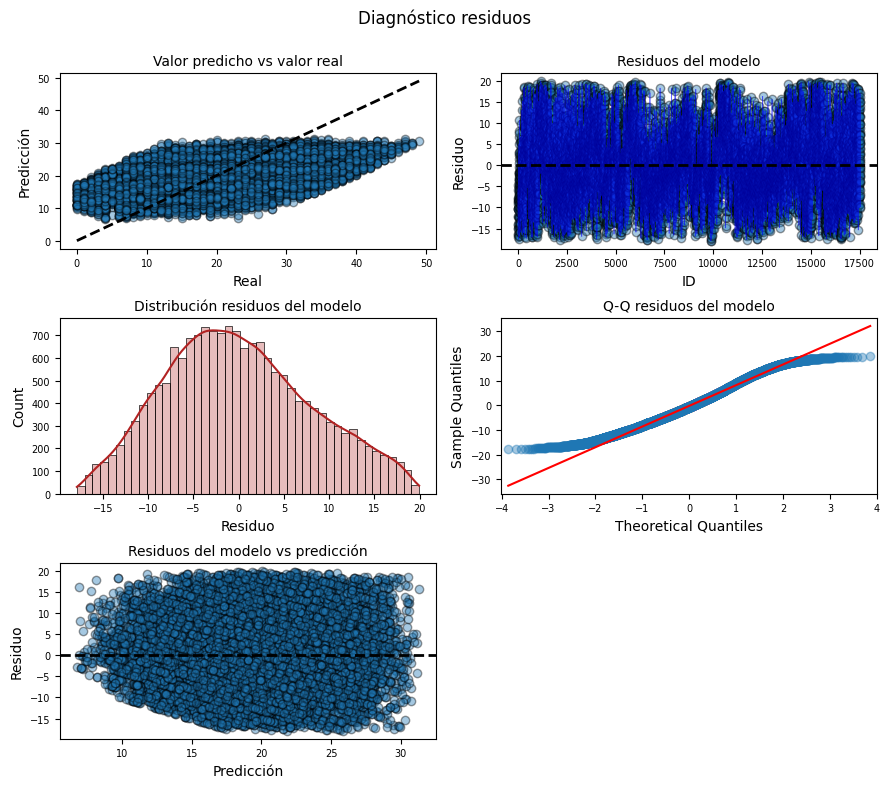

In [34]:
# Gráficos de diagnóstico
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# Valor predicho vs valor real
axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize=7)

# Residuos del modelo
axes[0, 1].scatter(range(len(residuos)), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].plot(range(len(residuos)), residuos, color='blue', lw=0.5, alpha=0.6)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize=10)
axes[0, 1].set_xlabel('ID')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize=7)

# Distribución de residuos
sns.histplot(residuos, kde=True, ax=axes[1, 0], color='firebrick', alpha=0.3)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

# Q-Q plot
sm.qqplot(residuos, line='q', ax=axes[1, 1], color='firebrick', alpha=0.4, lw=2)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

# Residuos vs predicción
axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Eliminar el último gráfico vacío
fig.delaxes(axes[2, 1])

# Ajustar diseño
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12)
plt.show()


### Normalidad de los residuos 

Hipotesis Nula -> Se distribuyen de forma normal los residuos 

Hipotesis Alternativa -> No se distribuyen de forma normal los residuos

In [35]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")
if shapiro_test[1] < 0.05:
    print("Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro")
else :
    print("Hipótesis nula aceptada: los residuos se distribuyen de forma normal por el test de Shapiro")


# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")
if p_value < 0.05:
    print("Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test D'Agostino's K-squared")
else :
    print("Hipótesis nula aceptada: los residuos se distribuyen de forma normal por el test D'Agostino's K-squared")

Test Shapiro-Wilk: estadístico = 0.9865897902408283, p-value = 2.898333052896627e-37
Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test de Shapiro
Test D'Agostino's K-squared: estadístico = 628.5368431341474, p-value = 3.273095499650352e-137
Hipótesis nula rechazada: los residuos NO se distribuyen de forma normal por el test D'Agostino's K-squared


d:\programasProgramacion\anaconda\envs\monografia\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17538.
  res = hypotest_fun_out(*samples, **kwds)


### Varianza

Hipotesis Nula -> La varianza de los residuos es constante

Hipotesis Alternativa -> La varianza de los residuos NO es constante


In [36]:
# Varianza Constante
# Prueba de Breusch-Pagan
# H0: La varianza es constante
# Ha: La varianza no es constante
# ==============================================================================
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, x)

print(f"Estadístico LM = {lm}, p-value = {lm_p_value}")
if lm_p_value < 0.05:
    print("Hipótesis nula rechazada: los residuos no tienen varianza constante")
else :
    print("Hipótesis nula aceptada: los residuos tienen varianza constante")
print(f"Estadístico F = {fvalue}, p-value (F) = {f_p_value}")
if f_p_value < 0.05:
    print("Hipótesis nula rechazada: los residuos no tienen varianza constante")
else :
    print("Hipótesis nula aceptada: los residuos tienen varianza constante por el  f - estadístico")

Estadístico LM = 610.3474866591349, p-value = 3.1052756118392033e-114
Hipótesis nula rechazada: los residuos no tienen varianza constante
Estadístico F = 33.24385246307612, p-value (F) = 2.0372525542078453e-119
Hipótesis nula rechazada: los residuos no tienen varianza constante


In [37]:
# Varianza Constante
# Test de Levene

# H0: La varianza es constante
# Ha: La varianza no es constante
# ==============================================================================
resultadoLevene = levene(residuos, prediccion_train)
print(resultadoLevene)
if resultadoLevene.pvalue < 0.05:
    print("Hipótesis nula rechazada: los residuos no tienen varianza constante por test de Levene")
else :
    print("Hipótesis nula aceptada: los residuos tienen varianza constante por test de Levene")



LeveneResult(statistic=np.float64(5195.090006201644), pvalue=np.float64(0.0))
Hipótesis nula rechazada: los residuos no tienen varianza constante por test de Levene


Cuando observamos la gráfica de los residuos respecto a la predicción, se detalla que no se tiene una varianza constante debido a los espacios vacíos en las puntas de la gráfica, y de acuero al test de Levene, se confirma que no se tiene varianza constante

### Aleatoriedad

Dado a nuestro conjunto de gráficas, no se logra observar un patrón de comportamiento dentro de la gráfica de residuales, se puede concluir gráficamente que los residuos presentan una aleatoriedad para cumplir con el supuesto.

### Linealidad

La gráfica no presenta un comportamiento circular, además los valores en mayor proporción se encuentran entre los residuos de 20 y -20 podemos concluir gráficamente que los residuos presentan linealidad para cumplir con este supuesto.

### Guardar modelo Regresion Lineal para predecir partícula PM25

In [39]:
joblib.dump(modeloFinal, 'data/analytics/modelosPM25/modeloRegresionLinealPm25.pkl')

['data/analytics/modelosPM25/modeloRegresionLinealPm25.pkl']

### Ejecución Random Forest PM25

Librerias

In [190]:
import numpy as np
import pandas as pd
import joblib

#Librerias del modelo

from sklearn.ensemble import RandomForestRegressor
#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
#import statsmodels.api as sm
import math
#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import joblib

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Se importa nuestro DataSet Limpio a partir de la limpieza de datos

In [191]:
dataSetCalidadAire = pd.read_csv("data/stage/dataSetLimpio4.csv")

dataSetCalidadAire.head(3)

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,2024,1,1,0,16,1,20,84,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2024,1,1,2,47,1,18,82,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2024,1,1,6,39,1,17,84,0,0,...,1,0,0,0,0,1,0,1,0,0


Se divide nuestra variable objetivo para que quede en Y y X las columnas

In [192]:
columnasEliminar = ['pm25']
X = dataSetCalidadAire.drop(columns = columnasEliminar)
y = dataSetCalidadAire['pm25']

División de los datos 70% Entrenamiento 30% Testeo

In [193]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, #70 % de nuestros datos en entrenamiento
    random_state=1234,
    shuffle=True
)

Uso del Scaler para nuestro X_test X_train

In [194]:
columnasModelo = X.columns.tolist()
columnasModelo 
# Llamamos nuestro scaler ya guardado
scaler = joblib.load("data/stage/estandarizacionDataSet4.pkl")
# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(3)

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
10479,0.0000,0.0000,0.8333,0.2609,0.0000,0.3182,0.7209,0.9953,0.0000,0.0000,...,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
18821,0.0000,0.8750,0.2667,0.9130,0.0000,0.4545,0.6860,0.9953,0.0000,0.0000,...,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
14028,0.0000,0.7500,0.2667,0.3913,0.0000,0.5455,0.5000,0.9953,0.0000,0.2000,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


### Creación del modelo inicial

In [195]:
# Creación del modelo
modelRF = RandomForestRegressor(
            n_estimators = 25, #Con tanteo se escogio esta cantidad de árboles
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 'sqrt',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 123
         )
# Entrenamiento del modelo
modelRF.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=25, n_jobs=-1,
                      random_state=123)

### Evaluación del modelo Inicial

Error cuadrático Medio y el coficiente de determinación con respecto a las variables de testeo

In [196]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelRF.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 6.917887547755696
El error (r2) de test es: 0.5385454432879192


Error cuadrático Medio y el coficiente de determinación con respecto a las variables de train

In [197]:
# Error de train del modelo inicial
# ==============================================================================
predicciones = modelRF.predict(X = X_train)

rmse = mean_squared_error(y_true  = y_train, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de train es: {rmse}")

r2 = r2_score(y_train, predicciones)
print(f"El error (r2) de train es: {r2}")

El error (rmse) de train es: 2.75381646856164
El error (r2) de train es: 0.9261477209846938


In [198]:
len(dataSetCalidadAire)

19447

### Proceso para encontrar los hiperparametros  

Escalamos todo nuestro dataset para nuestro X_Completo

In [199]:
X_Completo = X
y_Completo = y

# Se escalan los datos numéricos de entrada
X_Completo[columnasModelo] = scaler.fit_transform(X_Completo[columnasModelo])

Estimar la cantidad de árboles mediante el Out of Bag Error

Valor óptimo de n_estimators(árboles): 35


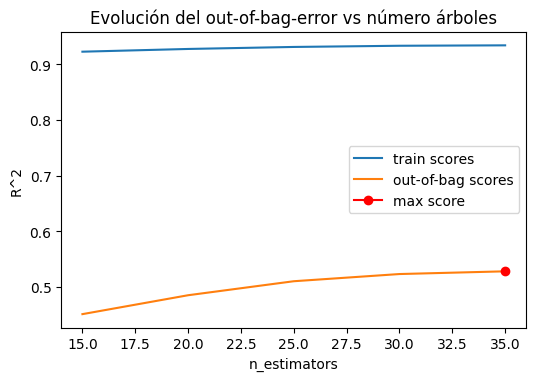

In [200]:
train_scores = []
oob_scores   = []

# se deja un rango de posibles cantidades de árboles para el modelo se dejo entre 15 a 40
estimator_range = range(15, 40, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.

for n_estimators in estimator_range:
    
    modelRF = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', #Squared error
                max_depth    = None, #No dejamos profundidad
                max_features = 'sqrt',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelRF.fit(X_Completo, y_Completo)
    train_scores.append(modelRF.score(X_Completo, y_Completo))
    oob_scores.append(modelRF.oob_score_)
    


# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend()
print(f"Valor óptimo de n_estimators(árboles): {estimator_range[np.argmax(oob_scores)]}")

Estimar la cantidad de árboles mediante validación cruzada

Valor óptimo de n_estimators: 35


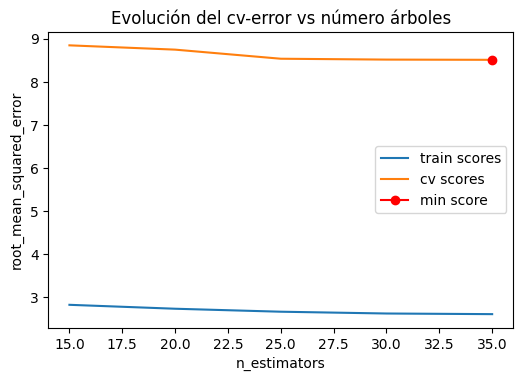

In [201]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(15, 40, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelRF = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', #quared error
                max_depth    = None, #Sin profundidad
                max_features = 'sqrt',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelRF.fit(X_Completo, y_Completo)
    predicciones = modelRF.predict(X = X_Completo)
    rmse = mean_squared_error(
            y_true  = y_Completo,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelRF,
                X         = X_Completo,
                y         = y_Completo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 3 #Dejamos 3 pliegues
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend()
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Estimar la cantidad de carácterísticas mediante el Out of Bag Error

Valor óptimo de max_features: 21


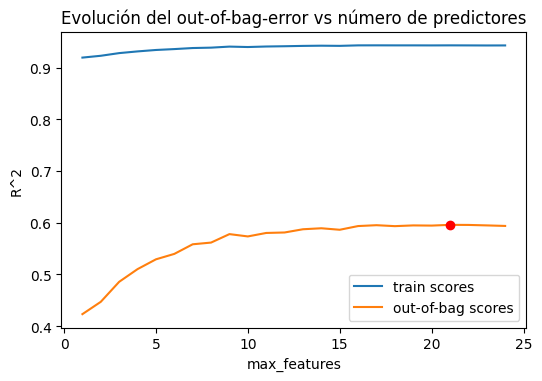

In [202]:
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_Completo.shape[1] + 1, 1) #X_train.shape[1] = total de características


# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelRF = RandomForestRegressor(
                n_estimators = 25,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelRF.fit(X_Completo, y_Completo)
    train_scores.append(modelRF.score(X_Completo, y_Completo))
    oob_scores.append(modelRF.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend()
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Estimar la cantidad de carácterísticas mediante validación Cruzada

Valor óptimo de max_features: 15


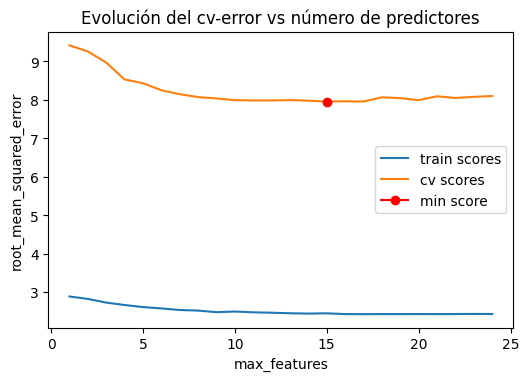

In [203]:
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_Completo.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelRF = RandomForestRegressor(
                n_estimators = 25,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelRF.fit(X_Completo, y_Completo)
    predicciones = modelRF.predict(X = X_Completo)
    rmse = mean_squared_error(
            y_true  = y_Completo,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelRF,
                X         = X_Completo,
                y         = y_Completo,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 3
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend()
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Ajustar los Hiperparámetros de acuerdos  estas validaciones

In [204]:
# Grid de hiperparámetros evaluados
param_grid = ParameterGrid(
                {'n_estimators': [15,20,25],
                 'max_features': [6,8,10,12,14],
                 'max_depth'   : [4,8,15]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelRF = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelRF.fit(X_Completo, y_Completo)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelRF.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados

resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(5)

Modelo: {'max_depth': 4, 'max_features': 6, 'n_estimators': 15} ✓
Modelo: {'max_depth': 4, 'max_features': 6, 'n_estimators': 20} ✓
Modelo: {'max_depth': 4, 'max_features': 6, 'n_estimators': 25} ✓
Modelo: {'max_depth': 4, 'max_features': 8, 'n_estimators': 15} ✓
Modelo: {'max_depth': 4, 'max_features': 8, 'n_estimators': 20} ✓
Modelo: {'max_depth': 4, 'max_features': 8, 'n_estimators': 25} ✓
Modelo: {'max_depth': 4, 'max_features': 10, 'n_estimators': 15} ✓
Modelo: {'max_depth': 4, 'max_features': 10, 'n_estimators': 20} ✓
Modelo: {'max_depth': 4, 'max_features': 10, 'n_estimators': 25} ✓
Modelo: {'max_depth': 4, 'max_features': 12, 'n_estimators': 15} ✓
Modelo: {'max_depth': 4, 'max_features': 12, 'n_estimators': 20} ✓
Modelo: {'max_depth': 4, 'max_features': 12, 'n_estimators': 25} ✓
Modelo: {'max_depth': 4, 'max_features': 14, 'n_estimators': 15} ✓
Modelo: {'max_depth': 4, 'max_features': 14, 'n_estimators': 20} ✓
Modelo: {'max_depth': 4, 'max_features': 14, 'n_estimators': 25} ✓
M

,oob_r2,max_depth,max_features,n_estimators
44,0.5961,15,14,25
41,0.5896,15,12,25
43,0.5841,15,14,20
38,0.5790,15,10,25
40,0.5757,15,12,20


In [205]:
# Mejores hiperparámetros por out-of-bag error
print("Mejores hiperparámetros encontrados (oob-r2)")
print(f"mejor hiperparametros: {resultados.head(1)}")
print(resultados.iloc[0,:]['oob_r2'], "R2")

Mejores hiperparámetros encontrados (oob-r2)
mejor hiperparametros:     oob_r2  max_depth  max_features  n_estimators
44  0.5961         15            14            25
0.5960559722942557 R2


Se realiza la busqueda de los mejores hiperparametros con GridSearch

In [206]:
#Se entrena el modelo con múltiples hiperparámetros buscando el mejor
modelRF = RandomForestRegressor(random_state = 123)
CV = 10
parameters =    {'n_estimators': [15,20,25],
                 'max_features': [6,8,10,12,14],
                 'max_depth'   : [4,8,15]
                }

grid_RF = GridSearchCV(
                    estimator  = modelRF,
                    param_grid = parameters,
                    scoring    =  'r2',      
                    n_jobs     = - 1,
                    cv         = CV, 
                    refit      = True,
                    verbose    = 3,
                    return_train_score = True
                   )

grid_RF.fit(X = X_Completo, y = y_Completo)


Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 15],
                         'max_features': [6, 8, 10, 12, 14],
                         'n_estimators': [15, 20, 25]},
             return_train_score=True, scoring='r2', verbose=3)

In [207]:
# Resultados
resultados = pd.DataFrame(grid_RF.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
44,15,14,25,0.3639,0.1675,0.8780,0.0069
38,15,10,25,0.3631,0.1502,0.8688,0.0066
41,15,12,25,0.3581,0.1642,0.8754,0.0071
37,15,10,20,0.3576,0.1517,0.8656,0.0067


In [208]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)


# Obtener los resultados del grid search
results_grid_RF = pd.DataFrame(grid_RF.cv_results_)


# Seleccionar las columnas deseadas
columns_grid_RF = ['param_max_depth']  + \
                    ['param_max_features']  + \
                    ['param_n_estimators']  + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_RF_filtered = results_grid_RF[columns_grid_RF]

# Crear la columna scoreWithStd: f1 / std
results_grid_RF_filtered['scoreWithStd'] = results_grid_RF_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_RF_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_RF_filtered[['param_max_depth', 'param_max_features','param_n_estimators', 'mean_test_score', 'std_test_score', 'scoreWithStd']].head(4)


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
0,4,6,15,0.1631,0.0953,1.7118
1,4,6,20,0.1687,0.0952,1.7717
2,4,6,25,0.1745,0.0941,1.8538
3,4,8,15,0.1980,0.0906,2.1854


In [209]:
# Se identifican los mejores hiperparámetros
best_params = grid_RF.best_params_
print('Mejores Parámetros : ',best_params)

Mejores Parámetros :  {'max_depth': 15, 'max_features': 14, 'n_estimators': 25}


In [210]:
# Top 3 de los mejores scores
results_grid_RF_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_max_depth', 'param_max_features','param_n_estimators', 'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
17,8,6,25,0.2939,0.0997,2.9489
16,8,6,20,0.2945,0.1003,2.9375
15,8,6,15,0.2871,0.1029,2.7904


In [211]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_RF_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_max_depth       8.0000
param_max_features    6.0000
param_n_estimators   25.0000
mean_test_score       0.2939
std_test_score        0.0997
split0_test_score     0.2845
split1_test_score     0.1232
split2_test_score     0.1944
split3_test_score     0.4437
split4_test_score     0.2547
split5_test_score     0.4076
split6_test_score     0.3533
split7_test_score     0.2619
split8_test_score     0.4035
split9_test_score     0.2117
scoreWithStd          2.9489
Name: 17, dtype: float64

In [212]:
results_grid_RF_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

np.float64(0.29385657730413545)

Parte Final para creación del Modelo con los mejores Hiperparametros

In [213]:
columnasEliminar = ['pm25']
X = dataSetCalidadAire.drop(columns = columnasEliminar)
y = dataSetCalidadAire['pm25']

In [214]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, #70 % de nuestros datos en entrenamiento
    random_state=1234,
    shuffle=True
)

Se corrobora la cantidad de datos

In [215]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

13612
5835
13612
5835


In [216]:
# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
columnasModelo = X.columns.tolist()
columnasModelo 
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(3)

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
10479,0.0000,0.0000,0.8333,0.2609,0.0000,0.3182,0.7209,0.9953,0.0000,0.0000,...,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
18821,0.0000,0.8750,0.2667,0.9130,0.0000,0.4545,0.6860,0.9953,0.0000,0.0000,...,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
14028,0.0000,0.7500,0.2667,0.3913,0.0000,0.5455,0.5000,0.9953,0.0000,0.2000,...,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Se desarrolla modelo Final

In [217]:
# Se crea un modelo Random con los mejores hiperparámetros 
modeloFinalRF = RandomForestRegressor( max_depth = int(results_grid_RF_filtered.loc
                                                    [indice_max_scoreWithStd]["param_max_depth"])
                               , max_features = int(results_grid_RF_filtered.loc
                                                    [indice_max_scoreWithStd]["param_max_features"])
                               , n_estimators = int(results_grid_RF_filtered.loc
                                                    [indice_max_scoreWithStd]["param_n_estimators"])
                               , random_state = 1234)
#Se entrena el modelo con los datos completos
modeloFinalRF.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=6, n_estimators=25,
                      random_state=1234)

Error cuadrático Medio y el coficiente de determinación con respecto a las variables de testeo

In [218]:
# Error de test del modelo Final 

predicciones = modeloFinalRF.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 7.510020074404275
El error (r2) de test es: 0.45616877677036305


Error cuadrático Medio y el coficiente de determinación con respecto a las variables de train

In [219]:
#Error de train del modelo Final
predicciones = modeloFinalRF.predict(X = X_train)

rmse = mean_squared_error(y_true  = y_train, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de train es: {rmse}")

r2 = r2_score(y_train, predicciones)
print(f"El error (r2) de train es: {r2}")



El error (rmse) de train es: 7.1645272307182415
El error (r2) de train es: 0.5001162817707341


In [220]:
importancia_predictores = pd.DataFrame(
                            {'predictor': dataSetCalidadAire.drop(columns = columnasEliminar).columns,
                             'importancia': modeloFinalRF.feature_importances_}
                            )
print("Importancia de los predictores en el modelo\n")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo



,predictor,importancia
1,mes,0.3864
21,franja_horaria_Mañana,0.0965
2,dia,0.0835
6,humedad,0.0785
3,hora,0.0772
5,temperatura,0.0497
23,franja_horaria_Tarde,0.0381
11,direccion_prom,0.0354
12,direccion_max,0.0318
7,presion,0.0262


### Guardar el modelo final

In [221]:
joblib.dump(modeloFinalRF, 'data/analytics/modelosPM25/modeloRandomForestPM25.pkl')

['data/analytics/modelosPM25/modeloRandomForestPM25.pkl']

### Árbol de Decisión Regresion 

In [2]:
# Librerias Tratamiento de Datos
import pandas as pd

# Almacenamiento 
import joblib

# Entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Escalar Variables
from sklearn.preprocessing import MinMaxScaler

# Evaluación del modelo
from sklearn.metrics import r2_score


#Creación de modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Gráficos

import matplotlib.pyplot as plt



### DataSet

In [4]:
url='data/stage/dataSetLimpio4.csv'

In [5]:
df=pd.read_csv(url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19447 entries, 0 to 19446
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   anio                        19447 non-null  int64
 1   mes                         19447 non-null  int64
 2   dia                         19447 non-null  int64
 3   hora                        19447 non-null  int64
 4   pm25                        19447 non-null  int64
 5   festivo                     19447 non-null  int64
 6   temperatura                 19447 non-null  int64
 7   humedad                     19447 non-null  int64
 8   presion                     19447 non-null  int64
 9   p1                          19447 non-null  int64
 10  velocidad_prom              19447 non-null  int64
 11  velocidad_max               19447 non-null  int64
 12  direccion_prom              19447 non-null  int64
 13  direccion_max               19447 non-null  int64
 14  dia_se

In [7]:
# Variables de Entrada
variablesNumericas=df.select_dtypes(include=['int64']).columns.tolist()
df[variablesNumericas].head(5)

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,2024,1,1,0,16,1,20,84,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2024,1,1,2,47,1,18,82,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2024,1,1,6,39,1,17,84,0,0,...,1,0,0,0,0,1,0,1,0,0
3,2024,1,1,8,29,1,21,74,0,0,...,1,0,0,0,0,1,0,1,0,0
4,2024,1,1,9,38,1,22,71,0,0,...,1,0,0,0,0,1,0,1,0,0


### Modelo

In [9]:
# Se establecen la variable de entrada 'X' 
# la variable de de salida 'y' eliminando la variable PM25 y anio
X=df.drop(columns=['pm25'])
y = df['pm25']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.7,
                                        random_state = 12345,
                                        shuffle      = True
                                    )
X_train.head()

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
14029,2024,7,9,10,0,25,50,852,0,1,...,1,0,1,0,0,0,0,1,0,0
1186,2024,2,27,1,0,19,86,0,0,1,...,1,0,0,0,0,1,1,0,0,0
7702,2024,6,20,13,0,22,65,825,0,1,...,0,1,0,0,1,0,0,0,0,1
2135,2024,5,27,6,0,20,87,0,0,0,...,1,0,0,0,0,1,0,1,0,0
18366,2024,7,20,22,1,23,71,849,0,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Se determinan las variables numéricas a Escalar
columnasModelo = X.columns.tolist()
columnasModelo 

['anio',
 'mes',
 'dia',
 'hora',
 'festivo',
 'temperatura',
 'humedad',
 'presion',
 'p1',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max',
 'dia_semana_Fin de Semana',
 'dia_semana_Inicio Semana',
 'dia_semana_Media semana',
 'estacion_Estacion Aranjuez',
 'estacion_Estacion Belen',
 'estacion_Estacion Caldas',
 'estacion_Estacion Itagui',
 'franja_horaria_Madrugada',
 'franja_horaria_Mañana',
 'franja_horaria_Noche',
 'franja_horaria_Tarde']

In [12]:
# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(3)

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
14029,0.0,0.750,0.266667,0.434783,0.0,0.590909,0.430233,0.995327,0.0,0.2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1186,0.0,0.125,0.866667,0.043478,0.0,0.318182,0.848837,0.000000,0.0,0.2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7702,0.0,0.625,0.633333,0.565217,0.0,0.454545,0.604651,0.963785,0.0,0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#Creacion del Modelo de Arbole de Regresion
modelo=DecisionTreeRegressor(
         max_depth=3,
         random_state=123
)
#Entrenamiento del Modelo
modelo.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [14]:
#imprimos los valores del R2
print('Training',modelo.score(X_train,y_train))
print('Test    :',r2_score(y_test,modelo.predict(X_test)))

Training 0.29324600909551024
Test    : 0.284468987942032


Profundidad del árbol:3
Número de nodos:8


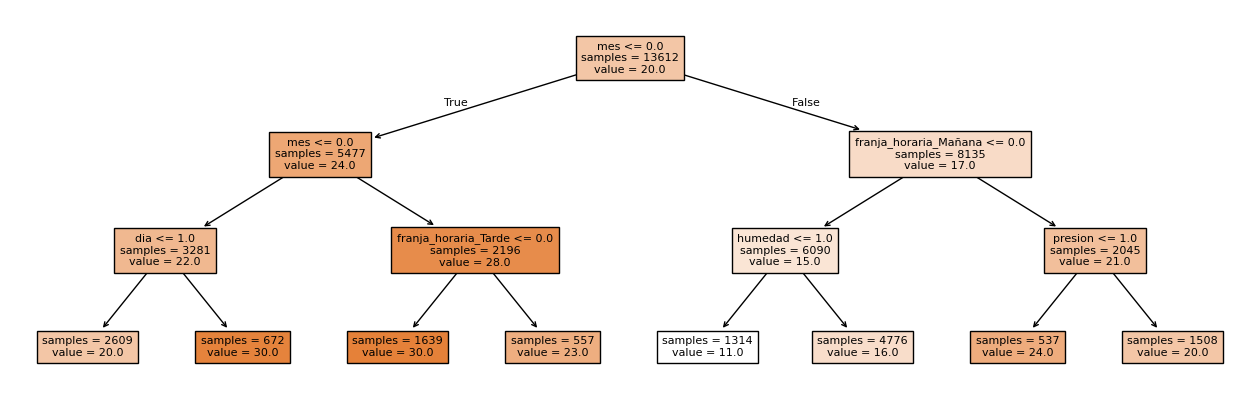

In [15]:
# Visualizamos la estructura del arbol

fig,ax=plt.subplots(figsize=(16,5))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = "pm25").columns,
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            precision     = 0,
            ax            = ax
       )
print(f'Profundidad del árbol:{modelo.get_depth()}')
print(f'Número de nodos:{modelo.get_n_leaves()}')

### Afinando el  modelo

In [17]:
X=df.drop(columns=['pm25'])
y=df['pm25']

# Se asignan los datos de X_completo  y y_completo
X_completo=X
y_completo=y

In [18]:
# Escalamos Variables
X_completo[columnasModelo]=scaler.fit_transform(X_completo[columnasModelo])
X_completo[columnasModelo].head()

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,0.0,0.0,0.0,0.000000,1.0,0.363636,0.825581,0.0,0.0,0.166667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.086957,1.0,0.272727,0.802326,0.0,0.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.260870,1.0,0.227273,0.825581,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.347826,1.0,0.409091,0.709302,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.391304,1.0,0.454545,0.674419,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Identificación de los mejores hiperparametros

In [20]:
# Se procede a entrenar el modelo con varios multiparametros para buscar el mejor

modeloTree=DecisionTreeRegressor()
CV=10

# Se establecen los hiperparametros
parametros={'max_depth': [2, 4, 6, 8,10,15,20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2']
           }

#Definimos un GridSearchCV con validacion cruzada

validacion=GridSearchCV(
    modeloTree,
    param_grid=parametros,
    cv=CV,
    verbose=3)
# Se entrena el GridSearchSV
validacion.fit(X_completo,y_completo)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits
[CV 1/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.088 total time=   0.0s
[CV 2/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.073 total time=   0.0s
[CV 3/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=-0.077 total time=   0.0s
[CV 4/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.313 total time=   0.0s
[CV 5/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.116 total time=   0.0s
[CV 6/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.088 total time=   0.0s
[CV 7/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.171 total time=   0.0s
[CV 8/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.056 t

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15]},
             verbose=3)

### Visualizacion de Resultados

In [22]:
resultados=pd.DataFrame(validacion.cv_results_)
resultados.filter(regex='(param*|mean_t|std_t)')\
    .drop(columns='params') \
    .sort_values('mean_test_score',ascending=False) \
    .head(4)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
125,6,None,5,5,0.273954,0.162225
130,6,None,10,10,0.273893,0.161405
121,6,None,2,5,0.273844,0.162236
126,6,None,5,10,0.273798,0.162084


In [23]:


# Obtener los resultados del grid search
results_grid_TreeR = pd.DataFrame(validacion.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_TreeR = ['param_max_depth']  + \
                    ['param_min_samples_split']  + \
                    ['param_min_samples_leaf']  + \
                    ['param_max_features']   + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y crear una copia explícita de los resultados
results_grid_TreeR_filtered = results_grid_TreeR[columns_grid_TreeR].copy()

# Crear la columna scoreWithStd: f1 / std usando .loc para evitar el warning
results_grid_TreeR_filtered.loc[:, 'scoreWithStd'] = results_grid_TreeR_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_TreeR_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_TreeR_filtered[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
0,2,2,2,None,0.105538,0.097151,1.086332
1,2,5,2,None,0.105538,0.097151,1.086332
2,2,10,2,None,0.105538,0.097151,1.086332
3,2,15,2,None,0.105538,0.097151,1.086332
4,2,2,5,None,0.105538,0.097151,1.086332
...,...,...,...,...,...,...,...
415,20,15,15,log2,0.031479,0.160709,0.195877
416,20,2,20,log2,0.061508,0.152026,0.404590
417,20,5,20,log2,-0.007644,0.296170,-0.025809
418,20,10,20,log2,0.001435,0.208203,0.006891


In [24]:
# Se identifican los mejores hiperparametros
mejoresParametros=validacion.best_params_
print('Mejores Hiperparametros: ',mejoresParametros)

Mejores Hiperparametros:  {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [25]:
#Observamos los 5 Mejores

results_grid_TreeR_filtered.sort_values(by='scoreWithStd', ascending=False).head(5)[
    ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
71,4,15,10,None,0.221933,0.12155,1.825856
60,4,2,2,None,0.221933,0.12155,1.825856
70,4,10,10,None,0.221933,0.12155,1.825856
69,4,5,10,None,0.221933,0.12155,1.825856
68,4,2,10,None,0.221933,0.12155,1.825856


In [26]:
 # Seleccionamos el indice maximo

registro_max_scoreWithStd = results_grid_TreeR_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_max_depth                   4
param_min_samples_split           2
param_min_samples_leaf            2
param_max_features             None
mean_test_score            0.221933
std_test_score              0.12155
split0_test_score          0.243014
split1_test_score          0.060625
split2_test_score            0.0512
split3_test_score          0.461324
split4_test_score          0.141372
split5_test_score          0.312538
split6_test_score          0.277991
split7_test_score          0.222855
split8_test_score          0.316314
split9_test_score          0.132094
scoreWithStd               1.825856
Name: 60, dtype: object

In [27]:
results_grid_TreeR_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

0.22193264218127579

###  Modelo Final

In [29]:
modeloTreeR = DecisionTreeRegressor( max_depth = mejoresParametros["max_depth"]
                               , min_samples_split = mejoresParametros["min_samples_split"]
                               , min_samples_leaf = mejoresParametros["min_samples_leaf"]
                               , max_features = mejoresParametros["max_features"]
                               , random_state = 1234)


#Se entrena el modelo con los datos completos
modeloTreeR.fit(X_completo, y_completo)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                      random_state=1234)

In [30]:
print(f'El resultado del modelo con los mejores hiperparametros es  de:{modeloTreeR.score(X_completo,y_completo)}')

El resultado del modelo con los mejores hiperparametros es  de:0.4349502870772104


### CCP_ALPHA

In [32]:
#Se crea una instancia de una DecisionTreeRegressor 
modeloTreeR_ccp = DecisionTreeRegressor( random_state = 123)

parametros = {'ccp_alpha': np.logspace(-6, 2, 9)}
metricas = 'R2'

CV = 10
grid_TreeR = GridSearchCV(
                          modeloTreeR_ccp, 
                          param_grid=parametros, 
                          cv=CV, 
                          #return_train_score = True,
                          verbose=3)
grid_TreeR.fit(X_completo,y_completo) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..................ccp_alpha=1e-06;, score=0.256 total time=   0.2s
[CV 2/10] END .................ccp_alpha=1e-06;, score=-1.158 total time=   0.2s
[CV 3/10] END .................ccp_alpha=1e-06;, score=-0.245 total time=   0.3s
[CV 4/10] END ..................ccp_alpha=1e-06;, score=0.257 total time=   0.2s
[CV 5/10] END .................ccp_alpha=1e-06;, score=-0.738 total time=   0.2s
[CV 6/10] END ..................ccp_alpha=1e-06;, score=0.045 total time=   0.2s
[CV 7/10] END .................ccp_alpha=1e-06;, score=-0.418 total time=   0.2s
[CV 8/10] END .................ccp_alpha=1e-06;, score=-0.879 total time=   0.2s
[CV 9/10] END ..................ccp_alpha=1e-06;, score=0.106 total time=   0.2s
[CV 10/10] END ................ccp_alpha=1e-06;, score=-0.446 total time=   0.1s
[CV 1/10] END ..................ccp_alpha=1e-05;, score=0.256 total time=   0.1s
[CV 2/10] END .................ccp_alpha=1e-05;,

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])},
             verbose=3)

In [34]:
# Resultados

resultados = pd.DataFrame(grid_TreeR.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_ccp_alpha,mean_test_score,std_test_score
5,0.100000,0.256304,0.175081
6,1.000000,0.192714,0.110039
7,10.000000,0.036094,0.125381
4,0.010000,-0.029165,0.346795
8,100.000000,-0.137977,0.156344
3,0.001000,-0.305865,0.471578
0,0.000001,-0.322016,0.468987
1,0.000010,-0.322016,0.468987
2,0.000100,-0.322690,0.470179


In [35]:
print(f'El mejor ccp_alpha es:{grid_TreeR.best_params_}')

El mejor ccp_alpha es:{'ccp_alpha': 0.1}


In [36]:
#Datos del Arbol Final

modelTreeR_ccp = grid_TreeR.best_estimator_
print(f"Profundidad del árbol: {modeloTreeR.get_depth()}")
print(f"Número de nodos terminales: {modeloTreeR.get_n_leaves()}")
print(f"Score: {grid_TreeR.best_score_}")

Profundidad del árbol: 6
Número de nodos terminales: 63
Score: 0.25630355867426036


In [37]:
# Modelo Final 


modelTreeR_ccp = DecisionTreeRegressor(
            ccp_alpha         = grid_TreeR.best_params_["ccp_alpha"],
            random_state      = 123
          )
modelTreeR_ccp.fit(X_completo, y_completo)

DecisionTreeRegressor(ccp_alpha=0.1, random_state=123)

In [38]:
joblib.dump(modeloTreeR, 'data/analytics/modelosPM25/ModeloArbol_PM25_CV.pkl')

['./modelos/ModeloArbolccp_PM25_CV_ccp.pkl']